<span style="color:red"><b><<<<<<< local</b></span>

<span style="color:red"><b><<<<<<< local</b></span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
df = pd.read_parquet(url, engine="pyarrow")


In [10]:
# --- 1. Estadísticas descriptivas ---
# Variables numéricas
num_cols = ["trip_distance", "fare_amount", "tip_amount", "tolls_amount"]

print("=== Estadísticas descriptivas ===")
print(df[num_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))

# Mediana por separado
print("\nMediana de cada variable:")
print(df[num_cols].median())

=== Estadísticas descriptivas ===
       trip_distance   fare_amount    tip_amount  tolls_amount
count   49390.000000  49390.000000  49390.000000  49390.000000
mean       10.120118     18.804332      2.772294      0.273023
std       618.776893     18.127869      3.759889      1.484335
min         0.000000   -200.000000     -0.900000      0.000000
25%         1.260000     10.000000      0.000000      0.000000
50%         2.030000     14.200000      2.160000      0.000000
75%         3.560000     21.200000      4.000000      0.000000
95%         9.735500     49.000000      8.580000      0.000000
99%        17.752200     90.000000     15.980000      6.940000
max     77463.550000    588.200000    153.300000     49.940000

Mediana de cada variable:
trip_distance     2.03
fare_amount      14.20
tip_amount        2.16
tolls_amount      0.00
dtype: float64


En este código se calcula y muestra la media, desviación estándar, etc., para cada variable numérica específica. Además, se imprime la mediana de cada variable por separado.

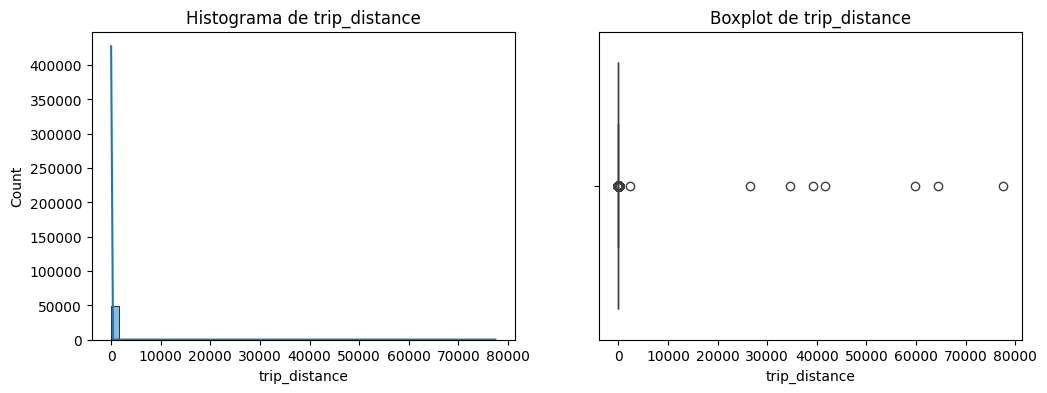

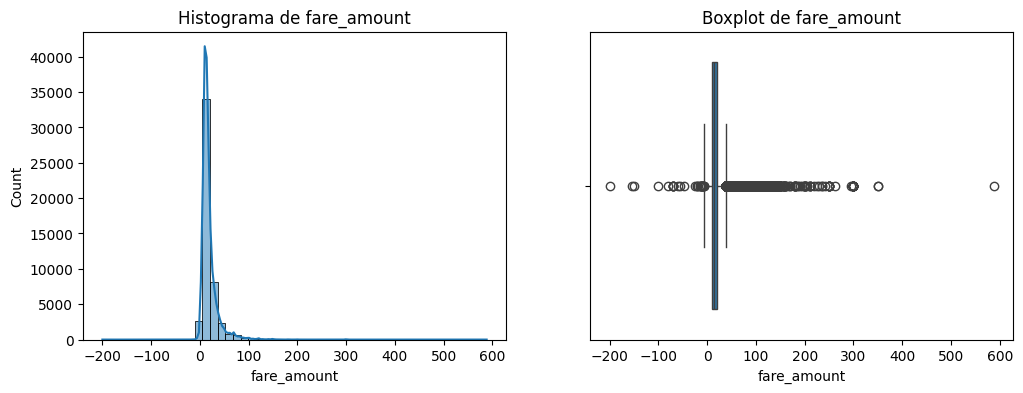

In [12]:
# --- 2. Histogramas y Boxplots ---
for col in ["trip_distance", "fare_amount"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df[col], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.show()

En este código se generan histogramas y boxplots para las variables numéricas trip_distance y fare_amount. Los histogramas muestran la distribución de los datos, mientras que los boxplots ayudan a identificar posibles outliers.


Frecuencia de valores en payment_type:
payment_type
1.0    74.610240
2.0    24.396448
3.0     0.684136
4.0     0.298213
5.0     0.010964
Name: proportion, dtype: float64


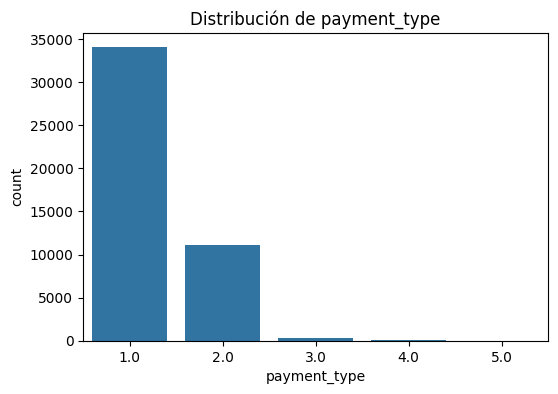


Frecuencia de valores en VendorID:
VendorID
2    85.861510
1    10.599312
6     3.539178
Name: proportion, dtype: float64


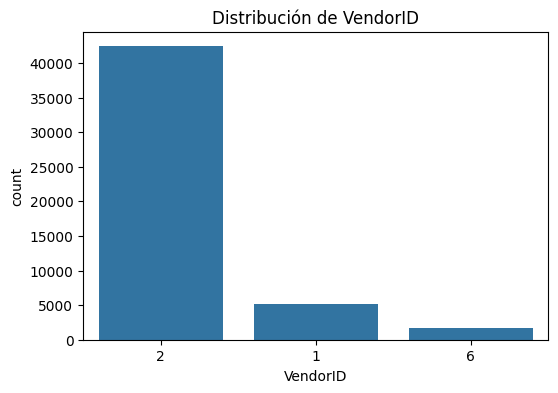


Frecuencia de valores en RatecodeID:
RatecodeID
1.0     93.193729
5.0      6.264664
2.0      0.317948
4.0      0.111830
3.0      0.074553
99.0     0.035084
6.0      0.002193
Name: proportion, dtype: float64


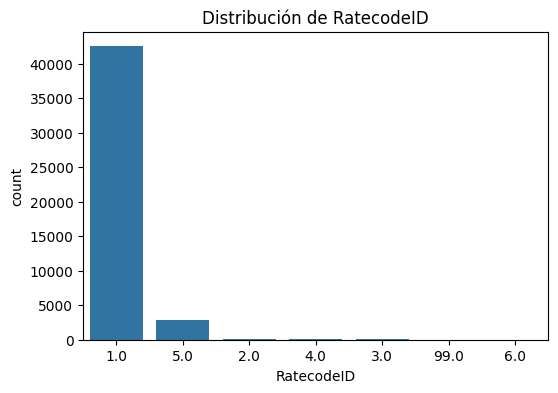

In [13]:
# --- 3. Frecuencias de variables categóricas ---
cat_cols = ["payment_type", "VendorID", "RatecodeID"]

for col in cat_cols:
    print(f"\nFrecuencia de valores en {col}:")
    print(df[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()

En este código se calculan las frecuencias relativas (en porcentaje) de los valores en las variables categóricas payment_type, VendorID y RatecodeID. Además, se generan gráficos de barras para visualizar la distribución de cada variable.


Viajes con tarifas negativas: 156
Viajes con distancias extremas (>100 millas): 9


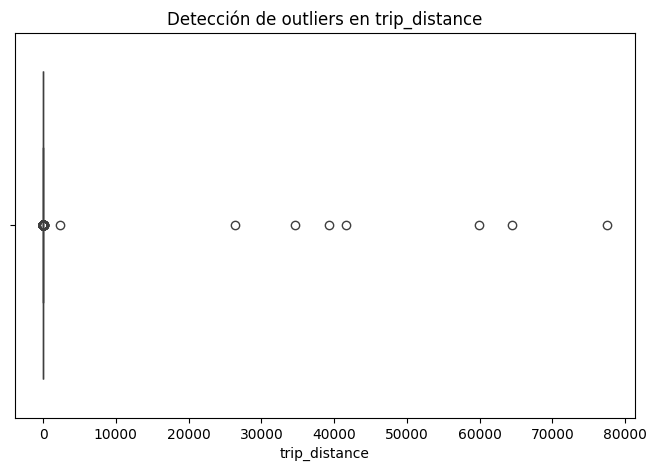

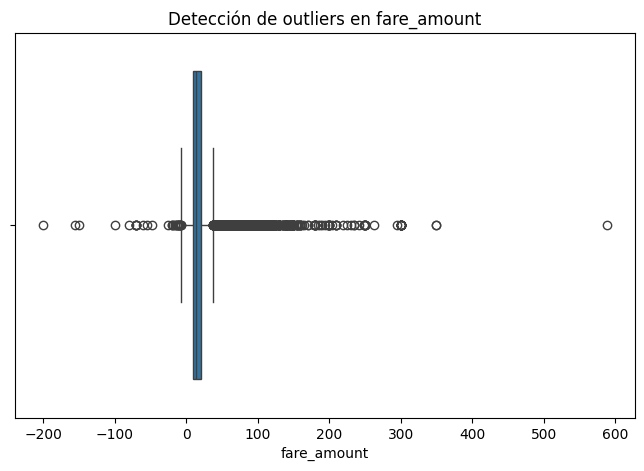

In [14]:
# --- 4. Identificación de Outliers ---
# Ejemplo: tarifas negativas o distancias extremas
outliers_fare = df[df["fare_amount"] < 0]
outliers_distance = df[df["trip_distance"] > 100]  # >100 millas poco probable

print(f"\nViajes con tarifas negativas: {len(outliers_fare)}")
print(f"Viajes con distancias extremas (>100 millas): {len(outliers_distance)}")

# Visualización de outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["trip_distance"])
plt.title("Detección de outliers en trip_distance")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fare_amount"])
plt.title("Detección de outliers en fare_amount")
plt.show()

En este código se identifican outliers en las variables fare_amount y trip_distance. Se detectan tarifas negativas y distancias mayores a 100 millas como casos extremos. Además, se generan boxplots para visualizar los outliers en ambas variables.

<span style="color:red"><b>=======</b></span>

# Vista inicial
Esta sección muestra las dimensiones iniciales del dataset y las primeras tres filas para obtener una vista previa de los datos. Esto ayuda a verificar la estructura y el contenido del dataset antes de realizar cualquier análisis o preprocesamiento.


EDA 2 - Análisis Bivariado
Dataset: Green Taxi Trip Records (NYC TLC)


1. Importar librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Configuración general de gráficos

In [15]:
# Configuración general de gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# 2. Cargar dataset (Parquet desde URL)
url_2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
registros_viajes_eco = pd.read_parquet(url_2, engine="pyarrow")

In [17]:
# Vista inicial
print("Dimensiones del dataset:", registros_viajes_eco.shape)
(registros_viajes_eco.head(3))

Dimensiones del dataset: (49390, 21)


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2025-06-01 00:33:43   2025-06-01 01:04:33                  N   
1         2  2025-06-01 00:07:45   2025-06-01 00:14:52                  N   
2         2  2025-06-01 00:24:07   2025-06-01 00:48:24                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         2.0            74           132              1.0          19.60   
1         1.0            75            74              2.0           1.37   
2         1.0            83            83              1.0           4.11   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0         70.0  ...      0.5       19.61          6.94        NaN   
1          9.3  ...      0.5        0.00          0.00        NaN   
2         25.4  ...      0.5        0.00          0.00        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         98.05           1.0        1.0   
1                    1.0         11.80           2.0        1.0   
2                    1.0         27.90           2.0        1.0   

   congestion_surcharge  cbd_congestion_fee  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  

[3 rows x 21 columns]

In [19]:
# 3. Preprocesamiento básico
# Verificar tipos de datos y convertir columnas de tiempo si es necesario
if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_pickup_datetime"]):
    registros_viajes_eco["lpep_pickup_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_pickup_datetime"], errors="coerce")
if not pd.api.types.is_datetime64_any_dtype(registros_viajes_eco["lpep_dropoff_datetime"]):
    registros_viajes_eco["lpep_dropoff_datetime"] = pd.to_datetime(registros_viajes_eco["lpep_dropoff_datetime"], errors="coerce")

# Crear columna de duración del viaje en minutos
registros_viajes_eco["trip_duration"] = (
    (registros_viajes_eco["lpep_dropoff_datetime"] - registros_viajes_eco["lpep_pickup_datetime"]).dt.total_seconds() / 60
)

# Verificar valores nulos o negativos en las columnas clave
print("Valores nulos antes del filtrado:")
print(registros_viajes_eco[["trip_distance", "fare_amount", "trip_duration"]].isnull().sum())

# Eliminar registros con valores negativos o nulos en variables clave
registros_viajes_eco = registros_viajes_eco[
    (registros_viajes_eco["trip_distance"] > 0) &
    (registros_viajes_eco["fare_amount"] > 0) &
    (registros_viajes_eco["trip_duration"] > 0)
]

# Verificar dimensiones después del filtrado
("Dimensiones después del filtrado:", registros_viajes_eco.shape)

Valores nulos antes del filtrado:
trip_distance    0
fare_amount      0
trip_duration    0
dtype: int64


('Dimensiones después del filtrado:', (47102, 22))

# Preprocesamiento básico
En esta sección se realiza el preprocesamiento de los datos:
1. Se convierten las columnas de tiempo al formato `datetime` si es necesario.
2. Se calcula la duración del viaje en minutos.
3. Se eliminan registros con valores nulos o negativos en las columnas clave (`trip_distance`, `fare_amount`, `trip_duration`).
4. Se verifica el tamaño del dataset después del filtrado.

 EDA 2 - Análisis Bivariado

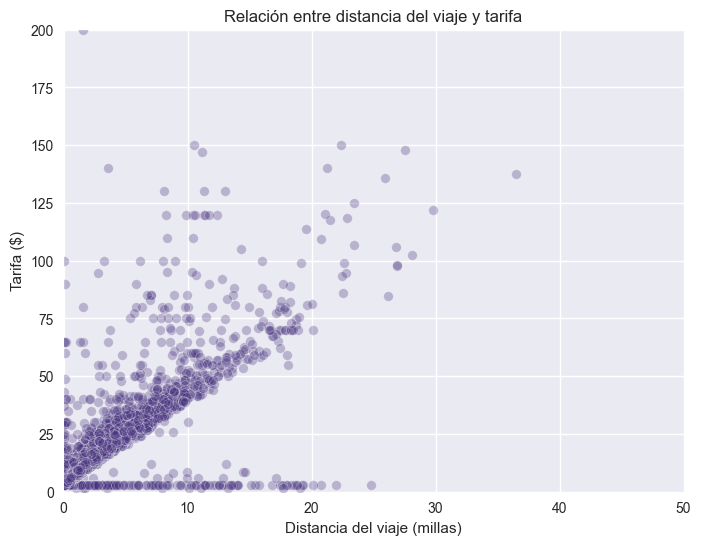

In [20]:
# 4. Scatterplot: trip_distance vs fare_amount
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=registros_viajes_eco.sample(5000, random_state=42),  # muestra para mejor visualización
    x="trip_distance", 
    y="fare_amount", 
    alpha=0.3
)
plt.xlim(0, 50)   # limitar valores extremos
plt.ylim(0, 200)
plt.title("Relación entre distancia del viaje y tarifa")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

# Relación entre distancia y tarifa
Se genera un scatterplot para analizar la relación entre la distancia del viaje y la tarifa. Se utiliza una muestra de 5000 registros para mejorar la visualización y se limitan los valores extremos en los ejes para una mejor interpretación.

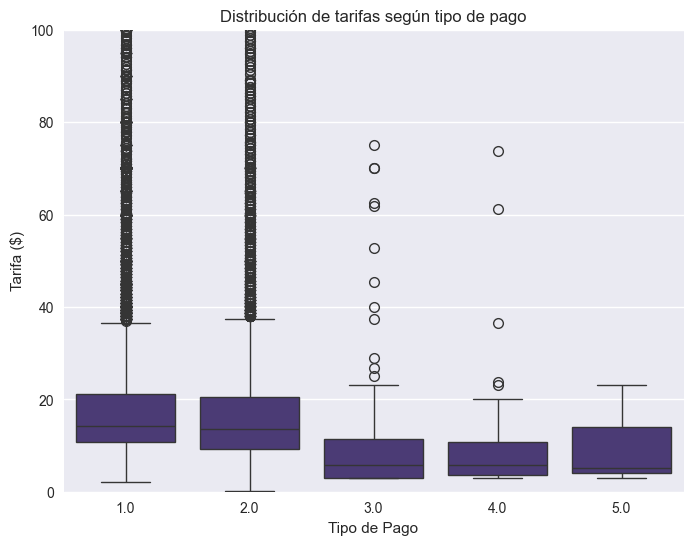

In [21]:
# 5. Boxplot: payment_type vs fare_amount
plt.figure(figsize=(8,6))
sns.boxplot(
    data=registros_viajes_eco, 
    x="payment_type", 
    y="fare_amount"
)
plt.ylim(0, 100)  # limitar valores extremos
plt.title("Distribución de tarifas según tipo de pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Tarifa ($)")
plt.show()

# Distribución de tarifas según tipo de pago
Se utiliza un boxplot para visualizar la distribución de tarifas según el tipo de pago. Este gráfico permite identificar la mediana, los cuartiles y los valores atípicos, limitando las tarifas a un máximo de $100 para evitar valores extremos.

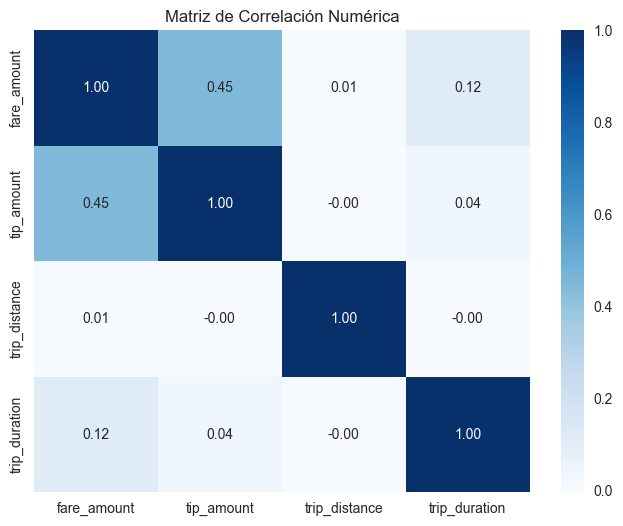

In [22]:
# 6. Matriz de correlación numérica
num_vars = ["fare_amount", "tip_amount", "trip_distance", "trip_duration"]
corr = registros_viajes_eco[num_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación Numérica")
plt.show()

# Matriz de correlación numérica
Se calcula y visualiza una matriz de correlación entre variables numéricas clave (`fare_amount`, `tip_amount`, `trip_distance`, `trip_duration`). El mapa de calor muestra los coeficientes de correlación para identificar relaciones entre las variables.

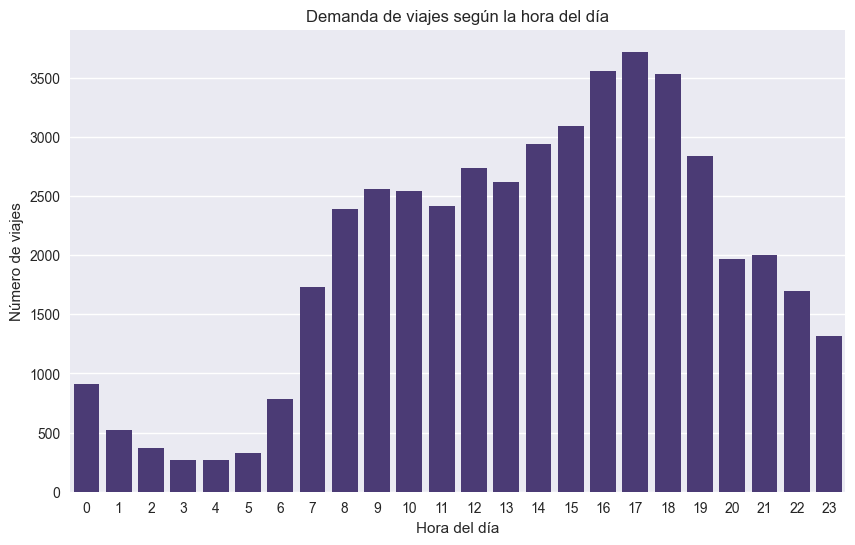

In [27]:
# 7. Análisis temporal: conteo de viajes por hora
registros_viajes_eco["pickup_hour"] = registros_viajes_eco["lpep_pickup_datetime"].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(
    data=registros_viajes_eco, 
    x="pickup_hour"
)
plt.title("Demanda de viajes según la hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

# Análisis temporal: Demanda por hora
Se analiza la distribución de la demanda de viajes según la hora del día. Se crea una nueva columna `pickup_hour` y se genera un gráfico de barras para visualizar el número de viajes por hora, utilizando la paleta de colores `viridis` para una mejor presentación.

# Conclusión
En este notebook trabajamos con los datos de "Green Taxi Trip Records". Primero limpiamos y preparamos la información, luego exploramos cómo se relacionan variables como la distancia y la tarifa, y finalmente analizamos patrones de demanda según la hora del día. Este análisis nos da una buena base para entender los datos y seguir trabajando con ellos.

<span style="color:red"><b>>>>>>>> remote</b></span>

<span style="color:red"><b>=======</b></span>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Cargar el dataset
url_2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
data = pd.read_parquet(url_2, engine="pyarrow")

In [23]:
# Convertir columnas de fecha y hora a formato datetime
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

## Justificación:

-Convertir las columnas de fecha y hora al formato datetime permite realizar operaciones temporales como calcular la duración del viaje, extraer características como la hora o el día, y analizar patrones temporales.

-Esto es esencial para tareas como la identificación de horas pico, estacionalidad, y análisis de demanda.

In [24]:
# Crear nuevas características temporales
data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.day_name()
data['pickup_month'] = data['lpep_pickup_datetime'].dt.month

## Justificación:

-pickup_hour: Permite analizar cómo varían las tarifas y la demanda a lo largo del día. Esto es útil para identificar horas pico y optimizar la asignación de vehículos.

-pickup_day: Ayuda a distinguir patrones entre días de la semana, como diferencias entre días laborales y fines de semana.

-pickup_month: Aunque en este caso el dataset es de un solo mes, esta característica sería útil para analizar tendencias a largo plazo si se tienen datos de varios meses.

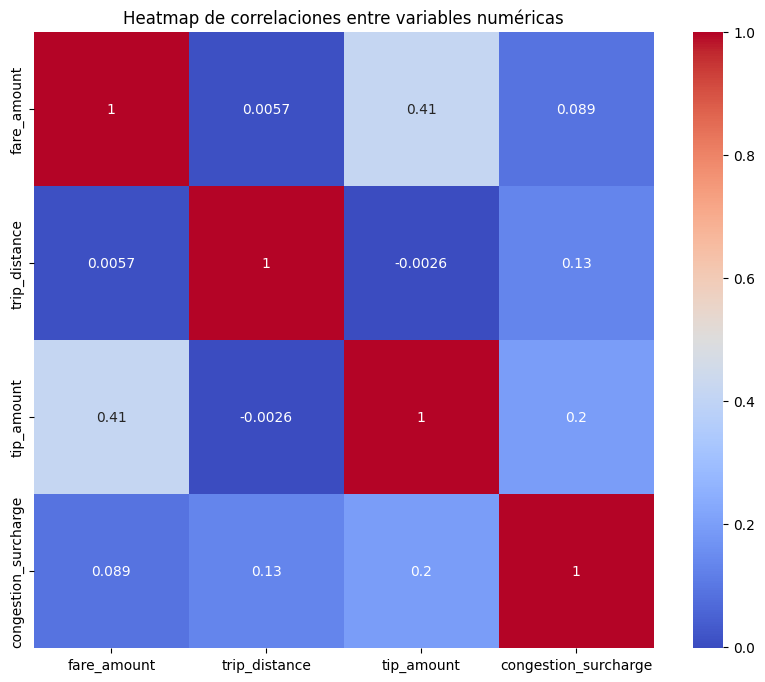

In [25]:
# 1. Heatmap de correlaciones de variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data[['fare_amount', 'trip_distance', 'tip_amount', 'congestion_surcharge']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de correlaciones entre variables numéricas")
plt.show()

## Justificación:
-El heatmap muestra las correlaciones entre variables numéricas clave, como fare_amount (tarifa), trip_distance (distancia del viaje), tip_amount (propinas) y congestion_surcharge (recargo por congestión).

-Esto ayuda a identificar relaciones importantes, como si la tarifa está fuertemente correlacionada con la distancia o si los recargos afectan significativamente el costo total.

-Las correlaciones pueden guiar la selección de variables para el modelado.

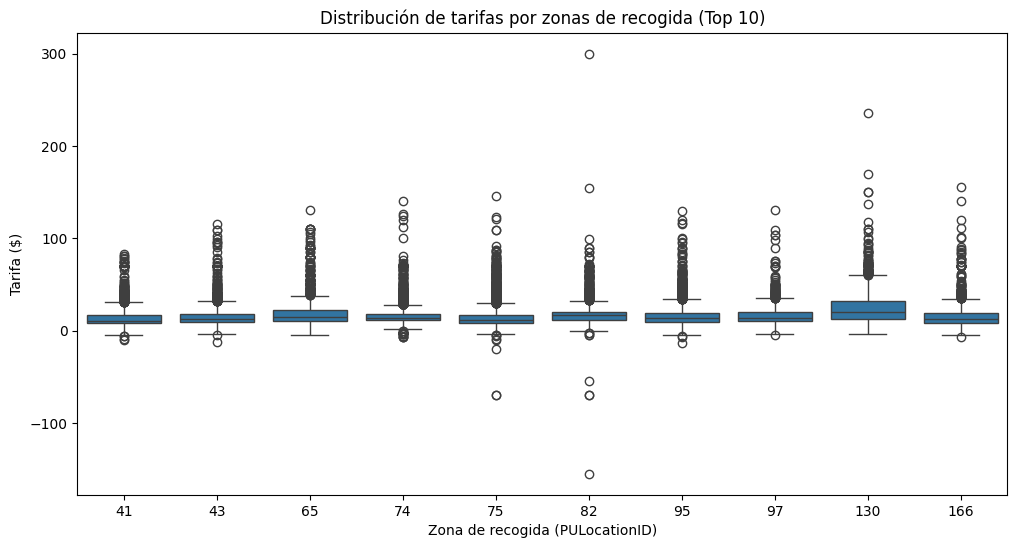

In [26]:
# 2. Comparar tarifas y duraciones por zonas geográficas (si están disponibles)
if 'PULocationID' in data.columns and 'DOLocationID' in data.columns:
    top_pickup_zones = data['PULocationID'].value_counts().head(10).index
    filtered_data = data[data['PULocationID'].isin(top_pickup_zones)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='PULocationID', y='fare_amount', data=filtered_data)
    plt.title("Distribución de tarifas por zonas de recogida (Top 10)")
    plt.xlabel("Zona de recogida (PULocationID)")
    plt.ylabel("Tarifa ($)")
    plt.show()

## Justificación:
-Este análisis compara las tarifas en las 10 zonas de recogida más frecuentes (PULocationID).

-Ayuda a identificar zonas con tarifas más altas o más bajas, lo que puede ser útil para la planificación de precios y la asignación de vehículos.

-Los boxplots muestran la variabilidad de las tarifas dentro de cada zona, lo que puede revelar patrones o anomalías.

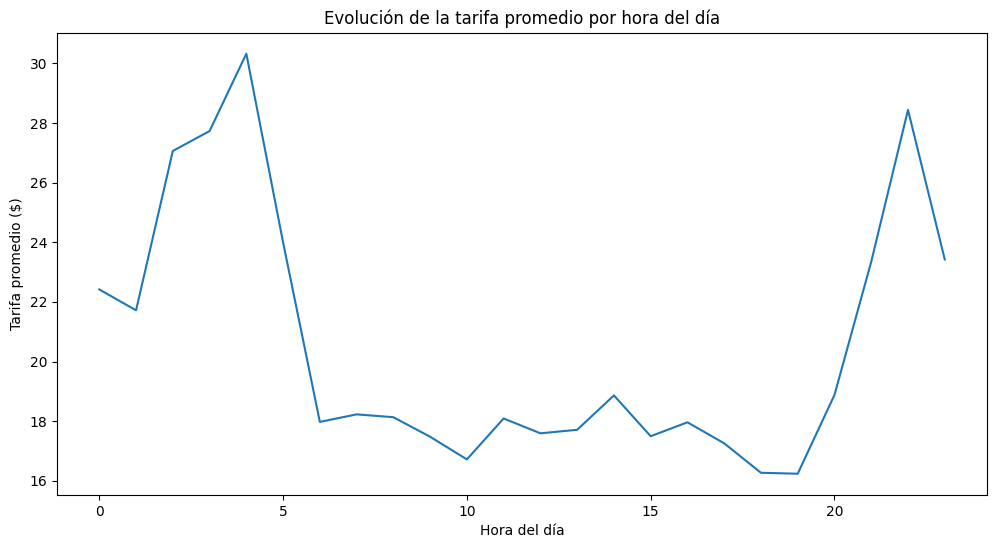

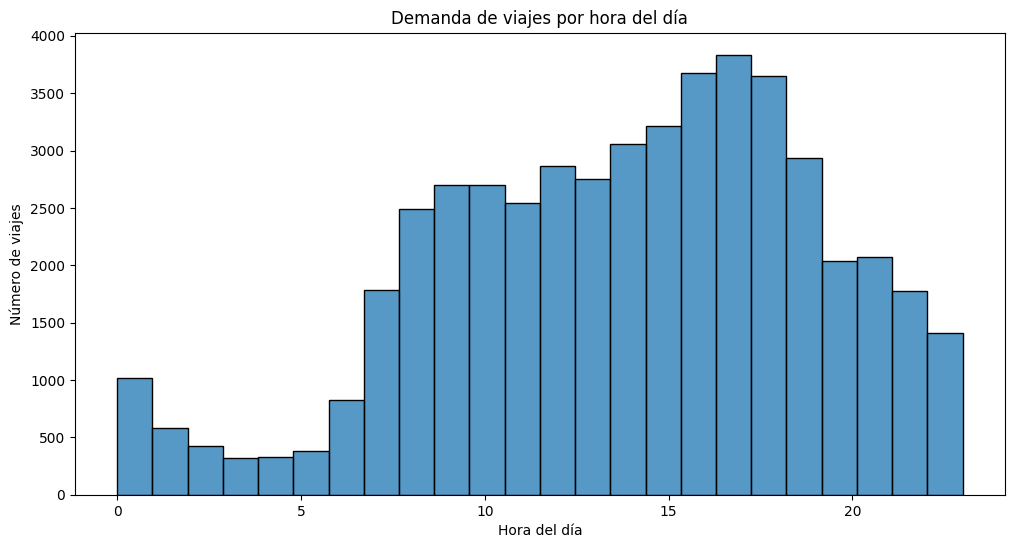

In [27]:
# 3. Series temporales: evolución de tarifas y demanda por horas del día
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='fare_amount', data=data, errorbar=None)
plt.title("Evolución de la tarifa promedio por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Tarifa promedio ($)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['pickup_hour'], bins=24, kde=False)
plt.title("Demanda de viajes por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

## Justificación:
-Evolución de tarifas promedio por hora del día:
Este análisis utiliza un gráfico de líneas para mostrar cómo varía la tarifa promedio a lo largo del día.
Permite identificar patrones horarios, como tarifas más altas durante las horas pico (por ejemplo, temprano en la mañana o al final de la tarde).
Es útil para entender cómo los factores temporales (como la congestión o la demanda) afectan las tarifas.

-Demanda de viajes por hora del día:
El histograma muestra la cantidad de viajes realizados en cada hora del día.
Ayuda a identificar las horas de mayor actividad (horas pico) y las horas de menor demanda.
Este análisis es clave para la planificación operativa, como la asignación de vehículos y conductores.

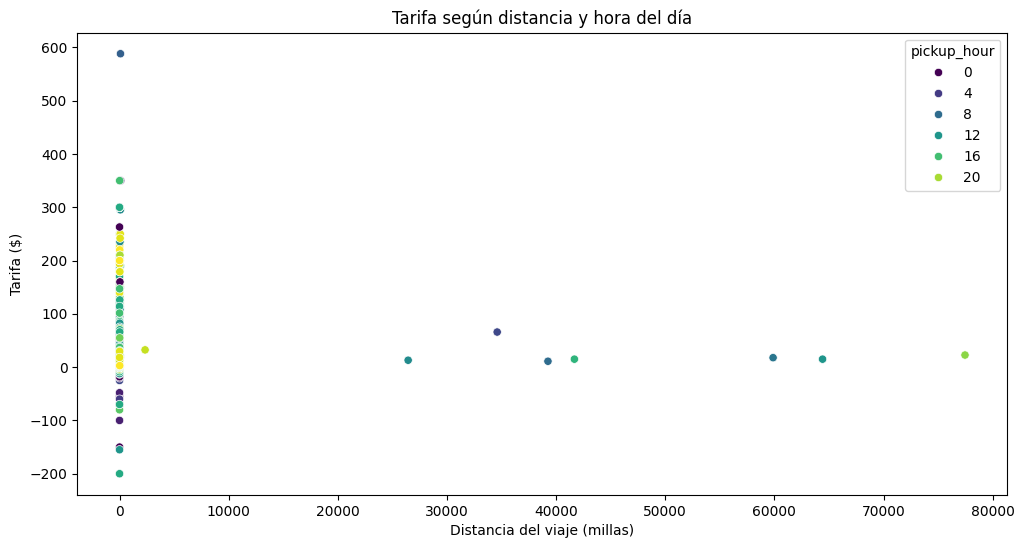

In [28]:
# 4. Cruces de múltiples variables: tarifa según distancia y hora del día
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='pickup_hour', palette='viridis', data=data)
plt.title("Tarifa según distancia y hora del día")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

## Justificación:
-Este análisis utiliza un gráfico de dispersión para explorar la relación entre la distancia del viaje y la tarifa, con la hora del día como una tercera dimensión (hue).

-Permite identificar:
    -Si las tarifas son proporcionales a la distancia.
    -Si hay variaciones significativas en las tarifas según la hora del día.
    -Anomalías, como tarifas inusualmente altas para distancias cortas o tarifas bajas para distancias largas.

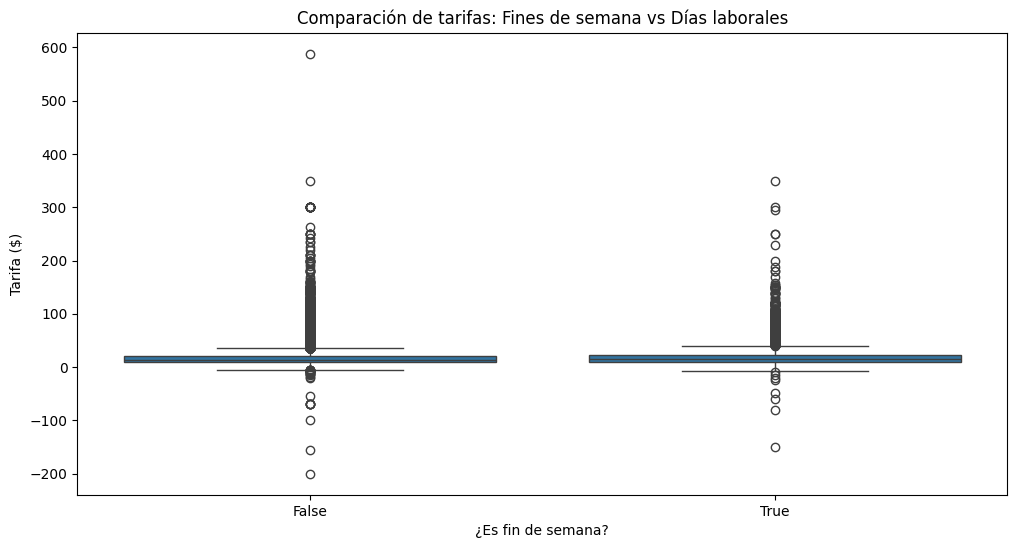

In [29]:
# 5. Identificar estacionalidad: fines de semana vs días laborales
data['is_weekend'] = data['pickup_day'].isin(['Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='fare_amount', data=data)
plt.title("Comparación de tarifas: Fines de semana vs Días laborales")
plt.xlabel("¿Es fin de semana?")
plt.ylabel("Tarifa ($)")
plt.show()

## Justificación:
-Este análisis compara las tarifas entre fines de semana y días laborales utilizando un boxplot.

-Permite identificar si las tarifas son consistentemente más altas o más bajas durante los fines de semana.

-Los fines de semana suelen tener patrones de demanda diferentes (por ejemplo, más viajes recreativos), lo que puede afectar las tarifas.

<span style="color:red"><b>>>>>>>> remote</b></span>